TU Delft internship of Bordeaux ENSEIRB -MATMECA student Anouchka Desmettre 
Dates: June 1st - August 31st, 2024 

Supervision: D. Lahaye (DIAM - EEMCS Faculty - TU Delft)

# Title: Mathematical modelling and numerical simulation of driving buses and vibrations door   

## 4 Two Point Mass System 

### 4.1 Case-study/Description/Motion: 

Consider a model with two interconnected point masses (2-DOF along x-axis). This can represent various scenarios such as a bus and door, two doors, a door separated into two parts, or a door separated into a glass and metal frame. The motion of the system can be described using the displacement of each mass along the x-axis.

### 4.2 Mathematical Model 

#### ODE for Two Mass-Spring-Damper System

Consider a system of two coupled point masses with the following equations of motion:

$
\begin{cases}
m_1 \ddot{u}_1(t) + \gamma_1 \dot{u}1(t) + k_1 (u_1(t) - u_2(t)) = F{external1}(t) \\
m_2 \ddot{u}_2(t) + \gamma_2 \dot{u}2(t) + k_2 (u_2(t) - u_1(t)) = F{external2}(t)
\end{cases}
$

where:

$ m_1 $ and $ m_2 $ are the masses

$ \gamma_1 $ and $ \gamma_2 $ are the damping coefficients

$ k_1 $ and $ k_2 $ are the spring constants

$ u_1(t) $ and $ u_2(t) $ are the displacements of the masses as functions of time

$ \dot{u}_1(t) $ and $ \dot{u}_2(t) $ are the velocities

$ \ddot{u}_1(t) $ and $ \ddot{u}_2(t) $ are the accelerations

$ F_{external1}(t) $ and $ F_{external2}(t) $ are the external forces applied to the masses


#### Initial Conditions

The system starts from rest, so the initial conditions are:

$
u_1(0) = 0 \quad \text{(zero initial position of mass 1)}
$

$
\dot{u}_1(0) = 0 \quad \text{(zero initial velocity of mass 1)}
$

$
u_2(0) = 0 \quad \text{(zero initial position of mass 2)}
$

$
\dot{u}_2(0) = 0 \quad \text{(zero initial velocity of mass 2)}
$

### 4.3 Parameter values

1. **Masses $m_1$ and $m_2$:**  
Between 50 and 100 kg for each mass.

2. **Spring Constants $k_1$ and $k_2$:** 
Such that $\sqrt{\frac{k_1}{m_1}}$ and $\sqrt{\frac{k_2}{m_2}}$ match the measured resonant frequencies $\omega_{01}$ and $\omega_{02}$, meaning that:
$ k_1 = m_1 \omega_{01}^2 $ and $ k_2 = m_2 \omega_{02}^2 $ (simple harmonic motion)

3. **Damping Coefficients $\gamma_1$ and $\gamma_2$:**
Hard to estimate directly. Resort to experimental measurements or tuning based on observations.

### 4.4 Impact study 

#### Test Case Description

- Two masses: $ m_1 $ and $ m_2 $
- Two springs with constants: $ k_1 $ and $ k_2$
- Two dampers with damping coefficients: $ \gamma_1 $ and $ \gamma_2 $

An impulsive force $ F_0 \delta(t - t_0) $ is applied to one of the masses, either $ m_1 $ or $ m_2 $.

$ \begin{cases}
   m_1 \ddot{u}_1(t) + \gamma_1 \dot{u}_1(t) + k_1 (u_1(t) - u_2(t)) = F_0 \delta(t - t_0) \\
   m_2 \ddot{u}_2(t) + \gamma_2 \dot{u}_2(t) + k_2 (u_2(t) - u_1(t)) = 0
   \end{cases}$ 


#### Analytical Solution Using Laplace Transform

1. **Equations of Motion**

In this case, we apply an impulsive force to the first mass and no external force to the second mass. \
Thus, $ F_{\text{external1}}(t) = F_0 \delta(t - t_0) $ and $ F_{\text{external2}}(t) = 0 $.

2. **Laplace Transform**

Taking the Laplace transform of both equations, we obtain:

$
\begin{cases}
m_1 s^2 U_1(s) + \gamma_1 s U_1(s) + k_1 (U_1(s) - U_2(s)) = F_0 e^{-s t_0} \\
m_2 s^2 U_2(s) + \gamma_2 s U_2(s) + k_2 (U_2(s) - U_1(s)) = 0
\end{cases}
$

3. **Solve Linear System**

First, we solve the second equation for $ U_2(s) $:

$
U_2(s) = \frac{k_2 U_1(s)}{m_2 s^2 + \gamma_2 s + k_2}
$

Now, we substitute this expression into the first equation:

$
m_1 s^2 U_1(s) + \gamma_1 s U_1(s) + k_1 U_1(s) - k_1 \left( \frac{k_2 U_1(s)}{m_2 s^2 + \gamma_2 s + k_2} \right) = F_0 e^{-s t_0}
$

We simplify this equation:

$
\left( m_1 s^2 + \gamma_1 s + k_1 - \frac{k_1 k_2}{m_2 s^2 + \gamma_2 s + k_2} \right) U_1(s) = F_0 e^{-s t_0}
$

We use:

$
A(s) = m_1 s^2 + \gamma_1 s + k_1
$

$
B(s) = \frac{k_1 k_2}{m_2 s^2 + \gamma_2 s + k_2}
$

Then:

$
(A(s) - B(s)) U_1(s) = F_0 e^{-s t_0}
$

So:

$
U_1(s) = \frac{F_0 e^{-s t_0}}{A(s) - B(s)}
$

And substituting back for $ U_2(s) $:

$
U_2(s) = \frac{k_2 U_1(s)}{m_2 s^2 + \gamma_2 s + k_2}
$

$
U_2(s) = \frac{k_2 F_0 e^{-s t_0}}{(A(s) - B(s))(m_2 s^2 + \gamma_2 s + k_2)}
$

4. **Inverse Laplace Transform**

Now, we perform the inverse Laplace transform to obtain $ u_1(t) $ and $ u_2(t) $:

From tables of Laplace transforms, we can use:

$ \mathcal{L}^{-1} \left\{ \frac{1}{s - a} \right\} = e^{at} $

$ \mathcal{L}^{-1} \left\{ \frac{1}{(s - a)^2 + b^2} \right\} = e^{at} \sin(bt) $

Using these, we can decompose $ U_1(s) $ and $ U_2(s) $ into partial fractions and then transform them back to the time domain.

First, we need to factor $ A(s) - B(s) $. This expression is a quadratic in $ s $, which can be written as:

$ A(s) - B(s) = \left( m_1 s^2 + \gamma_1 s + k_1 \right) - \left( \frac{k_1 k_2}{m_2 s^2 + \gamma_2 s + k_2} \right) $

For simplicity, let's denote this quadratic as:

$ A(s) - B(s) = D(s) $

Now we have:

$ U_1(s) = \frac{F_0 e^{-s t_0}}{D(s)} $

If we assume $D(s)$ factors as $(s - p_1)(s - p_2)$, we can then write:

$ U_1(s) = \frac{F_0 e^{-s t_0}}{(s - p_1)(s - p_2)} $

Using the inverse Laplace transform properties, we get:

$ u_1(t) = F_0 \left[ \frac{e^{p_1 (t - t_0)}}{p_1 - p_2} - \frac{e^{p_2 (t - t_0)}}{p_1 - p_2} \right] $

Similarly, substituting back for $U_2(s)$:

$ U_2(s) = \frac{k_2 F_0 e^{-s t_0}}{(A(s) - B(s))(m_2 s^2 + \gamma_2 s + k_2)} $

Assuming $m_2 s^2 + \gamma_2 s + k_2$ factors as $(s - q_1)(s - q_2)$, we can write:

$ U_2(s) = \frac{k_2 F_0 e^{-s t_0}}{(s - p_1)(s - p_2)(s - q_1)(s - q_2)} $

Using partial fractions, this can be decomposed into terms that can each be inverse Laplace transformed:

$ U_2(s) = \frac{k_2 F_0 e^{-s t_0}}{(s - p_1)(s - p_2)(s - q_1)(s - q_2)} $

Transforming back to the time domain:

$ u_2(t) = k_2 F_0 \left[ \frac{e^{p_1 (t - t_0)}}{(p_1 - p_2)(p_1 - q_1)(p_1 - q_2)} + \frac{e^{p_2 (t - t_0)}}{(p_2 - p_1)(p_2 - q_1)(p_2 - q_2)} - \frac{e^{q_1 (t - t_0)}}{(q_1 - p_1)(q_1 - p_2)(q_1 - q_2)} - \frac{e^{q_2 (t - t_0)}}{(q_2 - p_1)(q_2 - p_2)(q_2 - q_1)} \right] $

Thus, by inverse Laplace transforming, we get the time-domain solutions $u_1(t)$ and $u_2(t)$, which describe the displacements of the two masses over time in response to the impulsive force.

#### Analytical Solution Using Matrix Diagonalization (Including Damping)

1. **Rewrite the Equations as a first-order system using Matrix Form**:

   - Rewrite the second-order differential equations as a first-order system by defining the state vector state vector $z$ to include both the displacements ($u$) and the velocities ($\dot{u}$)

So we create : 
$z = \begin{pmatrix}
u_1 \\
u_2 \\
\dot{u}_1 \\
\dot{u}_2
\end{pmatrix}
 = \begin{pmatrix}
   u_1 \\
   u_2 \\
   v_1 \\
   v_2
   \end{pmatrix}$, now the equation system is : 
$   \begin{cases}
   \dot{u}_1 = v_1 \\
   \dot{u}_2 = v_2 \\
   m_1 \dot{v}_1 + \gamma_1 v_1 + k_1 (u_1 - u_2) = F_0 \delta(t - t_0) \\
   m_2 \dot{v}_2 + \gamma_2 v_2 + k_2 (u_2 - u_1) = 0
   \end{cases}
$

The state-space representation can be written as:
$
   \dot{z} = A z + B
\iff 
   \dot{z} = \begin{pmatrix}
   0 & 0 & 1 & 0 \\
   0 & 0 & 0 & 1 \\
   -\frac{k_1}{m_1} & \frac{k_1}{m_1} & -\frac{\gamma_1}{m_1} & 0 \\
   \frac{k_2}{m_2} & -\frac{k_2}{m_2} & 0 & -\frac{\gamma_2}{m_2}
   \end{pmatrix}
   z + \begin{pmatrix}
   0 \\
   0 \\
   \frac{1}{m_1} \\
   0
   \end{pmatrix}
   F_0 \delta(t - t_0)
 $

2. **Find the Eigenvalues of the System Matrix**:

   - Solve the eigenvalue problem for the matrix $ A $ to find the eigenvalues $ \lambda $.

We calculate: $ \text{det}(A - \lambda I) = 0  \iff \begin{vmatrix}
-\lambda & 0 & 1 & 0 \\
0 & -\lambda & 0 & 1 \\
-\frac{k_1}{m_1} & \frac{k_1}{m_1} & -\frac{\gamma_1}{m_1} - \lambda & 0 \\
\frac{k_2}{m_2} & -\frac{k_2}{m_2} & 0 & -\frac{\gamma_2}{m_2} - \lambda
\end{vmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix} \iff \lambda \left( \frac{k_1 m_2 \lambda + k_1 \gamma_2 + k_2 m_1 \lambda + k_2 \gamma_1 + m_1 m_2 \lambda^3 + m_1 \gamma_2 \lambda^2 + m_2 \gamma_1 \lambda^2 + \gamma_1 \gamma_2 \lambda}{m_1 m_2} \right) = 0 $

Finally, the eigenvalues are: $ \lambda_1 = 0 $

$ \lambda_2 = -\frac{-3a + d}{3 \left( \sqrt{-4 \left( -3a + d \right)^3 + \left( 27c - 9b a + 2 b^3 \right)^2} / 2 + 27c / 2 - 9b a / 2 + b^3 / 3 \right)^{1/3}} - \frac{\left( \sqrt{-4 \left( -3a + d \right)^3 + \left( 27c - 9b a + 2 b^3 \right)^2} / 2 + 27c / 2 - 9b a / 2 + b^3 / 3 \right)^{1/3}}{3} - \frac{b}{3} $

$ \lambda_3 = -\frac{-3a + d}{3 \left( -\frac{1}{2} - \frac{\sqrt{3}}{2}i \right) \left( \sqrt{-4 \left( -3a + d \right)^3 + \left( 27c - 9b a + 2 b^3 \right)^2} / 2 + 27c / 2 - 9b a / 2 + b^3 / 3 \right)^{1/3}} - \left( -\frac{1}{2} - \frac{\sqrt{3}}{2}i \right) \frac{\left( \sqrt{-4 \left( -3a + d \right)^3 + \left( 27c - 9b a + 2 b^3 \right)^2} / 2 + 27c / 2 - 9b a / 2 + b^3 / 3 \right)^{1/3}}{3} - \frac{b}{3} $

$ \lambda_4 = -\frac{-3a + d}{3 \left( -\frac{1}{2} + \frac{\sqrt{3}}{2}i \right) \left( \sqrt{-4 \left( -3a + d \right)^3 + \left( 27c - 9b a + 2 b^3 \right)^2} / 2 + 27c / 2 - 9b a / 2 + b^3 / 3 \right)^{1/3}} - \left( -\frac{1}{2} + \frac{\sqrt{3}}{2}i \right) \frac{\left( \sqrt{-4 \left( -3a + d \right)^3 + \left( 27c - 9b a + 2 b^3 \right)^2} / 2 + 27c / 2 - 9b a / 2 + b^3 / 3 \right)^{1/3}}{3} - \frac{b}{3} $

where:

$ a = \frac{k_1 m_2 + k_2 m_1 + \gamma_1 \gamma_2}{m_1 m_2} $

$ b = \frac{m_1 \gamma_2 + m_2 \gamma_1}{m_1 m_2} $

$ c = \frac{k_1 \gamma_2 + k_2 \gamma_1}{m_1 m_2} $

$ d = \frac{(m_1 \gamma_2 + m_2 \gamma_1)^2}{m_1^2 m_2^2} $


In [1]:
using SymPy

# Define the symbolic variables
@syms λ m1 m2 k1 k2 γ1 γ2

# Define the matrix A - λI
A_λ = [
    -λ  0      1      0;
     0 -λ      0      1;
  -k1/m1 k1/m1 -γ1/m1-λ  0;
   k2/m2 -k2/m2  0 -γ2/m2-λ
]

# Calculate the determinant
det_A_λ = SymPy.det(A_λ)
det_A_λ_simplified = simplify(det_A_λ)
println("The characteristic polynomial is: ", det_A_λ_simplified)

# Solve the characteristic equation for λ
#eigenvalues = solve(det_A_λ, λ)
#println("The eigenvalues are: ", eigenvalues)


The characteristic polynomial is: λ*(k1*m2*λ + k1*γ2 + k2*m1*λ + k2*γ1 + m1*m2*λ^3 + m1*γ2*λ^2 + m2*γ1*λ^2 + γ1*γ2*λ)/(m1*m2)


In [2]:
using SymPy

# Définir les symboles
λ = symbols("λ")
k1, k2, m1, m2, γ1, γ2 = symbols("k1 k2 m1 m2 γ1 γ2")

# Définir le polynôme
polynome = m1 * m2 * λ^3 + (m1 * γ2 + m2 * γ1) * λ^2 + (k1 * m2 + k2 * m1 + γ1 * γ2) * λ + (k1 * γ2 + k2 * γ1)

# Résoudre le polynôme
solutions = solve(polynome, λ)
println(solutions)


Sym{PyCall.PyObject}[-(-3*(k1*m2 + k2*m1 + γ1*γ2)/(m1*m2) + (m1*γ2 + m2*γ1)^2/(m1^2*m2^2))/(3*(sqrt(-4*(-3*(k1*m2 + k2*m1 + γ1*γ2)/(m1*m2) + (m1*γ2 + m2*γ1)^2/(m1^2*m2^2))^3 + (27*(k1*γ2 + k2*γ1)/(m1*m2) - 9*(m1*γ2 + m2*γ1)*(k1*m2 + k2*m1 + γ1*γ2)/(m1^2*m2^2) + 2*(m1*γ2 + m2*γ1)^3/(m1^3*m2^3))^2)/2 + 27*(k1*γ2 + k2*γ1)/(2*m1*m2) - 9*(m1*γ2 + m2*γ1)*(k1*m2 + k2*m1 + γ1*γ2)/(2*m1^2*m2^2) + (m1*γ2 + m2*γ1)^3/(m1^3*m2^3))^(1/3)) - (sqrt(-4*(-3*(k1*m2 + k2*m1 + γ1*γ2)/(m1*m2) + (m1*γ2 + m2*γ1)^2/(m1^2*m2^2))^3 + (27*(k1*γ2 + k2*γ1)/(m1*m2) - 9*(m1*γ2 + m2*γ1)*(k1*m2 + k2*m1 + γ1*γ2)/(m1^2*m2^2) + 2*(m1*γ2 + m2*γ1)^3/(m1^3*m2^3))^2)/2 + 27*(k1*γ2 + k2*γ1)/(2*m1*m2) - 9*(m1*γ2 + m2*γ1)*(k1*m2 + k2*m1 + γ1*γ2)/(2*m1^2*m2^2) + (m1*γ2 + m2*γ1)^3/(m1^3*m2^3))^(1/3)/3 - (m1*γ2 + m2*γ1)/(3*m1*m2), -(-3*(k1*m2 + k2*m1 + γ1*γ2)/(m1*m2) + (m1*γ2 + m2*γ1)^2/(m1^2*m2^2))/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-3*(k1*m2 + k2*m1 + γ1*γ2)/(m1*m2) + (m1*γ2 + m2*γ1)^2/(m1^2*m2^2))^3 + (27*(k1*γ2 + k2*γ1)/(m1*m2) 

3. **Find the Eigenvectors**:

   - The corresponding eigenvectors can be found by solving $ (A - \lambda I)v = 0 $ for each eigenvalue $ \lambda $.

Substitute $ \lambda = 0 $ into $ A - \lambda I $:


4. **Transform the System to Modal Coordinates**:

   - Use the eigenvectors to form the modal matrix $ V $, and transform the system to modal coordinates using $ \eta(t) = V^{-1} u(t) $.

5. **Solve the Decoupled Modal Equations**:

   - Solve the decoupled differential equations for each modal coordinate $ \eta_i(t) $.

The decoupled modal equations are:

$ \ddot{\eta}_1 + 2 \zeta_1 \omega_1 \dot{\eta}_1 + \omega_1^2 \eta_1 = f_1(t) $
$ \ddot{\eta}_2 + 2 \zeta_2 \omega_2 \dot{\eta}_2 + \omega_2^2 \eta_2 = f_2(t) $

where $ \zeta_i $ are the damping ratios, and $ \omega_i $ are the resonant frequencies.

6. **Transform the Solutions to Physical Coordinates**:

   - After solving the decoupled differential equations for each modal coordinate $ \eta_i(t) $, use the inverse transformation to obtain the solutions in physical coordinates $ u(t) = V \eta(t) $.


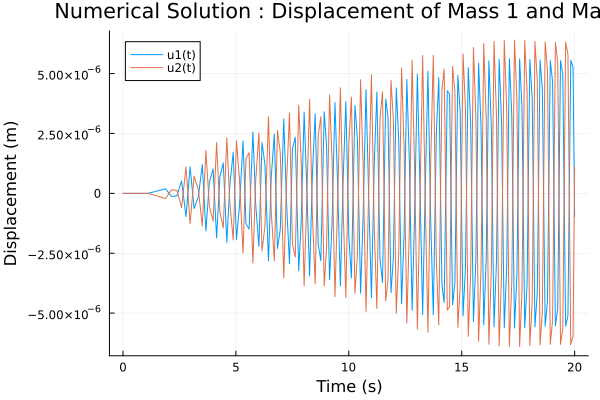

In [3]:
using DifferentialEquations, Plots

# Parameters
m1 = 75.0                    # Mass of the first object (kg)
m2 = 80.0                    # Mass of the second object (kg)
ω01 = 2 * π * 1.5            # Resonant frequency of the first mass (rad/s)
ω02 = 2 * π * 1.6            # Resonant frequency of the second mass (rad/s)
k1 = m1 * ω01^2              # Spring constant for the first mass
k2 = m2 * ω02^2              # Spring constant for the second mass
γ1 = 0.1                     # Damping coefficient for the first mass
γ2 = 0.1                     # Damping coefficient for the second mass
F0 = 1.0                     # Amplitude of the impulse
t0 = 0.5                     # Time of impact
sigma = 0.01                 # Width of Gaussian pulse

# Define the system of equations for the two-mass system
function two_mass_system!(du, u, p, t)
    m1, m2, γ1, γ2, k1, k2, F0, t0, sigma = p
    du[1] = u[2]
    du[2] = (F0 * exp(-((t - t0)^2) / (2 * sigma^2)) - γ1 * u[2] - k1 * (u[1] - u[3])) / m1
    du[3] = u[4]
    du[4] = (-γ2 * u[4] - k2 * (u[3] - u[1])) / m2
end

# Initial conditions
u0 = [0.0, 0.0, 0.0, 0.0]    # [u1(0), u1'(0), u2(0), u2'(0)]
tspan = (0.0, 20.0)          # Time span

# Problem definition
p = [m1, m2, γ1, γ2, k1, k2, F0, t0, sigma]
prob = ODEProblem(two_mass_system!, u0, tspan, p)

# Solve the problem
sol = solve(prob, Tsit5())

# Plot the solutions
plot(sol.t, sol[1,:], label="u1(t)", xlabel="Time (s)", ylabel="Displacement (m)", title="Numerical Solution : Displacement of Mass 1 and Mass 2")
plot!(sol.t, sol[3,:], label="u2(t)")

# Display the plot
display(plot!())


### 4.5 Modeling a Two-Mass System with Four Nodes and Three Springs without Damping

#### Case Description

Consider a system with four nodes (two movable and two static) connected by three springs ($k_1$, $k_2$ and $k_3$). The first and last nodes are fixed, while the middle nodes contain the masses $m_1$ and $m_2$. 

<img src="2masses_3springs.png" alt="2masses_3springs">


#### Equations of Motion

$
\begin{cases}
m_1 \frac{d^2 x_1}{dt^2} + k_1 x_1 + k_2 (x_1 - x_2) = F_0 \delta(t - t_0) \\ 
m_2 \frac{d^2 x_2}{dt^2} + k_3 x_2 + k_2 (x_2 - x_1) = 0
\end{cases}
$

These equations describe the dynamic behavior of the two-mass system when an impulsive force $ F_0 \delta(t - t_0) $ is applied to the first mass at time $t_0$.

#### Analytical Solution 
1. **Definition of the Connectivity Matrix, the Diagonal Matrix of Spring Constants and the Diagonal Mass Matrix**

The connectivity matrix $ B $ describes the kinematics (geometry of interconnections) between the points and the springs : 
$ 
B = \begin{pmatrix} 
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} 
$

The diagonal matrix $D$ contains the values of the spring constants. This matrix is of size $ 3 \times 3 $ because there are three springs 
$ 
D = \begin{pmatrix} 
k_1 & 0 & 0 \\
0 & k_2 & 0 \\
0 & 0 & k_3
\end{pmatrix} 
$

The diagonal matrix $M$ contains the values of the masses. This matrix is of size $ 2 \times 2 $ because there are two masses 
$ 
M = \begin{pmatrix} 
m_1 & 0 \\
0 & m_2 \\
\end{pmatrix} 
$


2. **Calculation of the Weighted Laplacian Matrix**

The weighted Laplacian matrix $ K $ is obtained by multiplying $ B $, $ D $, and the transpose of $ B $ : $ K = B^\top D B $

We compute:
$ 
K = \begin{pmatrix} 
1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & -1 & 1 \\ 0 & 0 & -1 \\ 
\end{pmatrix}
\begin{pmatrix} 
k_1 & 0 & 0  \\
0 & k_2 & 0  \\
0 & 0 & k_3 
\end{pmatrix}
\begin{pmatrix} 
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} 
\iff K = \begin{pmatrix} k_1 & -k_1 & 0 & 0 \\ -k_1 & k_1 + k_2 & -k_2 & 0 \\ 0 & -k_2 & k_2 + k_3 & -k_3 \\ 0 & 0 & -k_3 & k_3 \\\end{pmatrix} 
$

3. **Extraction of the Submatrix $ K_0 $**

The submatrix $ K_0 $ is obtained by removing the first and last rows and columns of $ K $, representing the fixed points.

$ K_0 = \begin{pmatrix}
k_1 + k_2 & -k_2 \\
-k_2 & k_2 + k_3
\end{pmatrix} $. Thus, $ K_0 $ only contains the elements corresponding to the mobile node

4. **Writing the System Equation with an Impulsive Force**:
   The equation of motion with an impulsive force $ F_0 \delta(t - t_0) $ applied to $ m_1 $ is given by:

$ 
M \ddot{\vec{u}}(t) = K_0 \vec{u}(t) + \vec{F}(t) 
$, where $ \vec{F}(t) $ is : $ 
\vec{F}(t) = \begin{pmatrix} 
F_0 \delta(t - t_0) \\
0 
\end{pmatrix}
$

### 4.6 Modeling a Two-Mass System with Four Nodes and Three Springs with Damping

#### Case Description

We consider the same system as before, but three dampers $gamma_1$, $\gamma_2$, and $\gamma_3$ connected along with the springs have been added.

<img src="DAMPING.png" alt="DAMPING">


#### Equations of Motion

$
\begin{cases}
m_1 \ddot{u}_1 + \gamma_1 \dot{u}_1 + \gamma_2 (\dot{u}_1 - \dot{u}_2) + k_1 u_1 + k_2 (u_1 - u_2) = F_0 \delta(t - t_0) \\ 
m_2 \ddot{u}_2 + \gamma_3 \dot{u}_2 + \gamma_2 (\dot{u}_2 - \dot{u}_1) + k_3 u_2 + k_2 (u_2 - u_1) = 0
\end{cases}
$

#### Analytical Solution adding Damping

1. **Definition of the Diagonal Damping Coefficient Matrix**

The diagonal matrix $ \Gamma $ contains the values of the damping coefficients.

$ \Gamma = \begin{pmatrix} 
\gamma_1 & 0 & 0 \\
0 & \gamma_2 & 0 \\
0 & 0 & \gamma_3
\end{pmatrix}
$

2. **Calculation of the Weighted Laplacian Matrix for Damping**

The weighted Laplacian matrix $ C $ is obtained by multiplying $ B $, $ \Gamma $, and the transpose of $ B $.

$ 
C = B^\top \Gamma B \iff  
C = \begin{pmatrix} 
\gamma_1 + \gamma_2 & -\gamma_2 & 0 & 0 \\
-\gamma_2 & \gamma_2 + \gamma_3 & -\gamma_3 & 0 \\
0 & -\gamma_3 & \gamma_3 + \gamma_4 & -\gamma_4 \\
0 & 0 & -\gamma_4 & \gamma_4
\end{pmatrix} 
$

3. **Extraction of the Submatrix $ C_0 $**

The submatrix $ C_0 $ is obtained by removing the first and last rows and columns of $ C $

$ 
C_0 = \begin{pmatrix} 
\gamma_2 + \gamma_3 & -\gamma_3 \\
-\gamma_3 & \gamma_3 + \gamma_4
\end{pmatrix} 
$

4. **Writing the System Equation with Damping**:
   The equation of motion with damping is given by:

$ 
M \ddot{\vec{u}}(t) + C_0 \dot{\vec{u}}(t) = K_0 \vec{u}(t) 
$

#### Steps to Solve the System : file:///home/anouchka/T%C3%A9l%C3%A9chargements/BEP_LisettedeBruin_FinalversionJuly.pdf page 48 

**Rewrite the System in State-Space Form**:
   To solve the second-order differential equation, we first convert it to a first-order system by defining the state vector $ z(t) = \begin{pmatrix} \vec{u}(t) \\ \dot{\vec{u}}(t) \end{pmatrix} $.

**Formulate the State-Space Representation**:
   The state-space representation is given by:
   $$
   \dot{z}(t) = \begin{pmatrix}
   0 & I \\
   -M^{-1} K_0 & -M^{-1} C_0
   \end{pmatrix} z(t) + \begin{pmatrix}
   0 \\
   M^{-1}
   \end{pmatrix} \vec{F}(t)
   $$
   where $ \vec{F}(t) = \begin{pmatrix} F_0 \delta(t - t_0) \\ 0 \end{pmatrix} $.

**Find the Eigenvalues and Eigenvectors**: file:///home/anouchka/T%C3%A9l%C3%A9chargements/student-report-partB_2023.pdf 
   Solve the eigenvalue problem for the matrix $ A = \begin{pmatrix}
   0 & I \\
   -M^{-1} K_0 & -M^{-1} C_0
   \end{pmatrix} $ to find the eigenvalues $ \lambda $ and eigenvectors $ v $.

**Transform to Modal Coordinates**:
   Use the eigenvectors to form the matrix $ V $. Transform the system to modal coordinates using $ \eta(t) = V^{-1} z(t) $.

**Solve the Decoupled Modal Equations**:
   In the modal coordinates, solve the decoupled differential equations for each modal coordinate $ \eta_i(t) $.

**Inverse Transform to Physical Coordinates**:
   After solving the modal equations, use the inverse transformation to obtain the solutions in physical coordinates $ \vec{u}(t) = V \eta(t) $.

#### Frequency Analysis

1. **Two Resonant Frequencies**:

   The system will have two resonant frequencies, corresponding to the eigenvalues found in the matrix diagonalization step.

2. **Two Vibrational Eigenmodes**:

   The system will have two vibrational eigenmodes, which can be visualized as the specific patterns of motion at each resonant frequency. (see comsol.com webpage)

#### Numerical Study

1. **Solve Numerically Using Time Integration**:

   Use numerical methods to solve the equations of motion over the specified time span.

2. **Compare Analytical and Numerical Solutions**:

   Compare the time-domain solutions $ u_1(t) $ and $ u_2(t) $ obtained analytically and numerically.

3. **Study stiffness**:

    definiton stifness donc on va étudider le systèem pour différentes valeurs de $\omega$ pour cela on va utiliser des masses yrès différentes 

4. **Frequency spectra**:

   Plot the frequency spectra of both masses over time to visualize the response of the system.

2. **Compare Analytical and Numerical Solutions**:

   Compare the time-domain solutions $ u_1(t) $ and $ u_2(t) $ obtained analytically and numerically.

3. **Study stiffness**:

    definiton stifness donc on va étudider le systèem pour différentes valeurs de $\omega$ pour cela on va utiliser des masses yrès différentes 

4. **Frequency spectra**:

   Plot the frequency spectra of both masses over time to visualize the response of the system.

### 4.5 Vibration study 


Impose forced vibration with driving frequency \omega_d on one of two point masses. Proceed as before.  Investigate frequency response, in particular \omega_d close to one of both resonant frequencies. 



References: 

https://github.com/ziolai/ventura-modeling/blob/main/jupyter-notebooks/point-mass-systems.ipynb 



## 5/ Stationary Thin Beam Equation - Biharmonic Equation - Deflection 


gti hub Dr. Lahaye : https://github.com/ziolai/finite_element_electrical_engineering/tree/main 

Find analytical reference solution on wiki pages. Recover analytical reference using shooting method implemented in  DifferentialEquations.jl (see internship Yann Oukrid). 



Solve bi-harmonic equation using finite difference method on uniform spatial mesh. 



(In case that Anouchka finds this interesting and fun). Solve bi-harmonic equation using finite element method on non-uniform spatial mesh. 



References: 

implementation in part available; 



## 6/ Thin Beam Equation Modal Analysis 



Find analytical expressions for the eigenmodes. Recover analytical expression by computing eigenvalues and eigenmodes of the discrete bi-harmonic equation. 



The eigenvectors of the matrix A are numerical approximation to the shape modes or modal modes of the structure. These modes are explained on the wiki page https://en.wikipedia.org/wiki/Modal_analysis_using_FEM . This webpage says that "The physical interpretation of the eigenvalues and eigenvectors which come from solving the system are that they represent the frequencies and corresponding mode shapes. Sometimes, the only desired modes are the lowest frequencies because they can be the most prominent modes at which the object will vibrate, dominating all the higher frequency modes.”



## 7/ Thin Beam Equation Transient Analysis 



Find analytical reference solution (using e.g,. separation of variables) in literature. 



Recover analytical reference solution using finite difference in space and time-integration iin time domain. 



(In case that Anouchka finds this interesting and fun): replace uniform mesh finite differences in space by non-uniform mesh finite elements in space. 



References: 

\url{https://en.wikipedia.org/wiki/Euler\%E2\%80\%93Bernoulli_beam_theory}



## 8/ Thin Beam Equation Transient Analysis with Hinges as Boundary conditions 



Find reference solutions (see e.g. papers by Demeio - Lenci - 2019) (need to give Anouchka access to paper). 



Reproduce reference results numerically using either finite differences on uniform mesh first and possibly using finite elements on non-uniform mesh later. 

voir page 11 : file:///home/anouchka/T%C3%A9l%C3%A9chargements/student-report-partB_2023.pdf étendre à 2D

## 9/ Extend to Two Dimensional Kirchoff - Love Thin Plate Equations 

[In case time, enthousiasm and excitement remains] 

References

\url{https://en.wikipedia.org/wiki/Kirchhoff\%E2\%80\%93Love\_plate\_theory}



## 10/ Conclusions 



What we learned in the project. 
